In [5]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
import config
import utils

np.random.seed(42)

In [6]:
data = utils.load_df(config.IA_P_PATH)

In [ ]:
# TODO - for renaming .txt to .tsv if exported as txt by mistake
# directory = '/Users/shubi/Data/onestop_report/Output/p_fixation_reports'

# for filename in os.listdir(directory):
#     if filename.endswith('.txt'):
#         new_filename = os.path.join(directory, filename.replace('.txt', '.tsv'))
#         os.rename(os.path.join(directory, filename), new_filename)
#         print(f'Renamed {filename} to {new_filename}')


# Article 0: 2 paragraphs which are not part of the 10 article experiment. We omit these from the analysis.

In [7]:
articles_1_10_data = data.loc[lambda x: x["article_id"] != 0]

In [8]:
print(
    f"No. subjects in the data: {len(articles_1_10_data['RECORDING_SESSION_LABEL'].unique())}"
)

No. subjects in the data: 360


In [9]:
# # Unpack unique_paragraph_id which is for example 1_7_Adv_5 to batch, article_id, level, paragraph_id by splitting by '_'
# et_data_enriched[['batch', 'article_id', 'level', 'paragraph_id']] = et_data_enriched['unique_paragraph_id'].str.split('_', expand=True)

groupby_columns = [
    "batch",
    "has_preview",
    "article_id",
    "paragraph_id",
    "level",
    "RECORDING_SESSION_LABEL",
    "list",
    "reread",
    "TRIAL_INDEX",
]
other_columns = [
    "article_ind",
    "answers_order",
    "q_ind",
]

et_data_enriched = articles_1_10_data[groupby_columns + other_columns].drop_duplicates()

In [10]:
assert et_data_enriched.groupby(groupby_columns).size().max() == 1

In [11]:
# make paragraph_id, article_id, batch, list, reread, article_ind, q_ind numeric
to_make_numeric = [
    "paragraph_id",
    "article_id",
    "batch",
    "list",
    "reread",
    "article_ind",
    "q_ind",
]
for col in to_make_numeric:
    et_data_enriched[col] = pd.to_numeric(et_data_enriched[col])


et_data_enriched

,batch,has_preview,article_id,paragraph_id,level,RECORDING_SESSION_LABEL,list,reread,TRIAL_INDEX,article_ind,answers_order,q_ind
276,3,1,6,1,Ele,l42_2070,42,0,4,1,[1 2 3 0],2
374,3,1,6,2,Adv,l42_2070,42,0,5,1,[1 2 0 3],2
435,3,1,6,3,Ele,l42_2070,42,0,6,1,[2 3 0 1],0
503,3,1,6,4,Adv,l42_2070,42,0,7,1,[1 3 0 2],1
608,3,1,6,5,Ele,l42_2070,42,0,8,1,[3 1 0 2],1
...,...,...,...,...,...,...,...,...,...,...,...,...
2631648,3,0,6,3,Ele,l2_324,2,1,72,12,[1 3 2 0],2
2631716,3,0,6,4,Adv,l2_324,2,1,73,12,[0 1 2 3],1
2631821,3,0,6,5,Ele,l2_324,2,1,74,12,[1 3 0 2],1
2631931,3,0,6,6,Adv,l2_324,2,1,75,12,[1 0 3 2],2


# Making sure each participant reads 54 paragraphs in articles 1-10

In [12]:
et_data_enriched_no_reread = et_data_enriched[et_data_enriched["reread"] == 0]
print("These subjects have more/less than 54 trials:")
(
    et_data_enriched_no_reread.groupby("RECORDING_SESSION_LABEL")
    .size()
    .rename("No. experiment trials")
    .reset_index()
    .loc[lambda x: x["No. experiment trials"] != 54]
    .merge(
        et_data_enriched[["RECORDING_SESSION_LABEL", "batch", "has_preview"]],
        how="left",
    )
    .drop_duplicates()
)

These subjects have more/less than 54 trials:


,RECORDING_SESSION_LABEL,No. experiment trials,batch,has_preview
0,l13_213,53,2,0
63,l34_277,53,2,0


Which paragraphs did they miss?

In [13]:
et_data_enriched_no_reread.query(
    f"batch == 2 & article_id == 10 & paragraph_id==3 & level =='Adv' & q_ind==0 & has_preview==1"
).drop_duplicates().sort_values(["has_preview", "list"])

,batch,has_preview,article_id,paragraph_id,level,RECORDING_SESSION_LABEL,list,reread,TRIAL_INDEX,article_ind,answers_order,q_ind
1081222,2,1,10,3,Adv,l6_176,6,0,16,3,[0 1 2 3],0
1169817,2,1,10,3,Adv,l12_204,12,0,48,7,[1 2 3 0],0
1146390,2,1,10,3,Adv,l18_222,18,0,27,4,[1 2 3 0],0
1199961,2,1,10,3,Adv,l24_236,24,0,72,9,[3 2 1 0],0
1135543,2,1,10,3,Adv,l30_249,30,0,71,10,[0 2 1 3],0
229307,2,1,10,3,Adv,l36_524,36,0,9,2,[1 0 2 3],0
1106626,2,1,10,3,Adv,l42_297,42,0,54,9,[3 1 0 2],0
1235220,2,1,10,3,Adv,l48_315,48,0,57,9,[0 3 2 1],0
1260590,2,1,10,3,Adv,l54_499,54,0,17,3,[0 2 1 3],0
1288711,2,1,10,3,Adv,l60_505,60,0,12,2,[0 3 1 2],0


In [14]:
et_data_enriched_no_reread.query(f"RECORDING_SESSION_LABEL == 'l13_213'")

,batch,has_preview,article_id,paragraph_id,level,RECORDING_SESSION_LABEL,list,reread,TRIAL_INDEX,article_ind,answers_order,q_ind
2292829,2,0,5,1,Adv,l13_213,13,0,6,1,[0 1 2 3],1
2292958,2,0,5,2,Adv,l13_213,13,0,9,1,[0 3 2 1],0
2293117,2,0,5,3,Ele,l13_213,13,0,10,1,[3 1 0 2],2
2293189,2,0,5,4,Adv,l13_213,13,0,11,1,[2 0 3 1],1
2293290,2,0,5,5,Ele,l13_213,13,0,12,1,[3 1 0 2],1
2293368,2,0,7,1,Ele,l13_213,13,0,13,2,[2 3 1 0],0
2293441,2,0,7,2,Ele,l13_213,13,0,14,2,[1 2 3 0],2
2293538,2,0,7,3,Adv,l13_213,13,0,15,2,[2 0 1 3],1
2293635,2,0,7,4,Adv,l13_213,13,0,16,2,[1 0 3 2],0
2293757,2,0,7,5,Ele,l13_213,13,0,18,2,[2 0 3 1],0


In [15]:
for i in range(1, 11):
    print(f"Article id: {i}")
    print("Set of missed paragraph_id's:")
    print(
        (
            set(
                et_data_enriched_no_reread.query(f"batch == 2 and article_id == {i}")[
                    ["batch", "article_id", "paragraph_id"]
                ]
                .drop_duplicates()["paragraph_id"]
                .unique()
            )
            - set(
                et_data_enriched_no_reread.query(
                    f'RECORDING_SESSION_LABEL == "l13_213"and article_id == {i}'
                )["paragraph_id"].unique()
            )
        )
    )

Article id: 1
Set of missed paragraph_id's:
set()
Article id: 2
Set of missed paragraph_id's:
set()
Article id: 3
Set of missed paragraph_id's:
set()
Article id: 4
Set of missed paragraph_id's:
set()
Article id: 5
Set of missed paragraph_id's:
set()
Article id: 6
Set of missed paragraph_id's:
set()
Article id: 7
Set of missed paragraph_id's:
set()
Article id: 8
Set of missed paragraph_id's:
set()
Article id: 9
Set of missed paragraph_id's:
set()
Article id: 10
Set of missed paragraph_id's:
{4}


In [16]:
print(
    f"The length of et_data_enriched_no_reread is supposed to be 360*54=19440. It is {len(et_data_enriched_no_reread)}"
)

The length of et_data_enriched_no_reread is supposed to be 360*54=19440. It is 19438


# Checking that for every (batch, condition) pair there is 1 appearance of every list

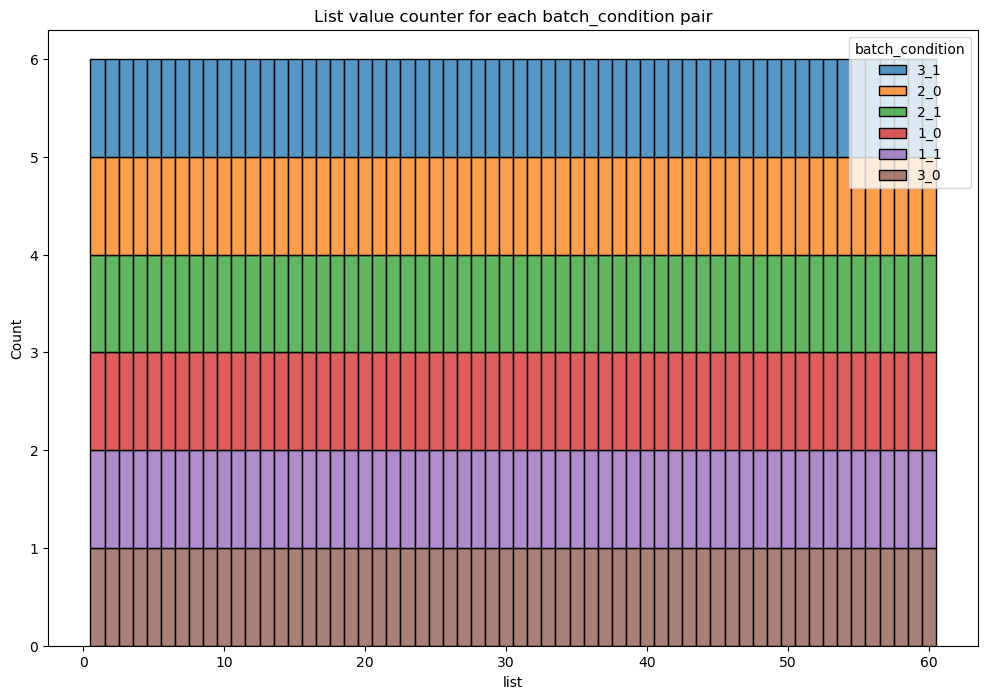

In [17]:
plt.figure(figsize=(12, 8))
batch_cond_list = et_data_enriched[["batch", "has_preview", "list"]].drop_duplicates()
batch_cond_list["batch_condition"] = batch_cond_list.apply(
    lambda x: f'{x["batch"]}_{x["has_preview"]}', axis=1
)
sns.histplot(
    data=batch_cond_list,
    x="list",
    hue="batch_condition",
    multiple="stack",
    bins=60,
    discrete=True,
    binwidth=2,
)
plt.title("List value counter for each batch_condition pair")
plt.show()

In [18]:
list_subject_division = (
    et_data_enriched[["batch", "has_preview", "list", "RECORDING_SESSION_LABEL"]]
    .drop_duplicates()
    .groupby(["batch", "has_preview", "list"])
    .apply(lambda x: x["RECORDING_SESSION_LABEL"].unique())
    .reset_index()
    .rename(columns={0: "subs"})
)
list_subject_division["num_subs"] = list_subject_division["subs"].apply(
    lambda x: len(x)
)
list_subject_division.set_index(["batch", "has_preview", "list"], inplace=True)
lists_with_multiple_subs = list_subject_division[list_subject_division["num_subs"] > 1]
print("Multiple subjects that have the same list value:")
lists_with_multiple_subs

Multiple subjects that have the same list value:


/var/folders/fz/wnp3jl2n1z1gsgdq_g6_34ww0000gn/T/ipykernel_29892/3201545907.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  list_subject_division = et_data_enriched[['batch', 'has_preview', 'list', 'RECORDING_SESSION_LABEL']].drop_duplicates().groupby(['batch', 'has_preview', 'list']).apply(lambda x: x['RECORDING_SESSION_LABEL'].unique()).reset_index().rename(columns={0: 'subs'})


,,,subs,num_subs
batch,has_preview,list,,


# Questions related validations

## Verify that each question has 10 subjects for each difficulty level of a paragraph (articles 1-10)

In [19]:
trials_questions = et_data_enriched[
    [
        "batch",
        "has_preview",
        "article_id",
        "paragraph_id",
        "q_ind",
        "level",
        "RECORDING_SESSION_LABEL",
        "article_ind",
    ]
].drop_duplicates()
Qs_subs_per_level = (
    trials_questions.loc[lambda x: x["article_ind"] <= 10]
    .groupby(["batch", "has_preview", "article_id", "paragraph_id", "q_ind", "level"])
    .size()
    .rename("No. subjects")
    .reset_index()
    .sort_values(
        ["batch", "has_preview", "article_id", "paragraph_id", "q_ind", "level"]
    )
    .reset_index(drop=True)
)
Qs_subs_per_level

,batch,has_preview,article_id,paragraph_id,q_ind,level,No. subjects
0,1,0,1,1,0,Adv,10
1,1,0,1,1,0,Ele,10
2,1,0,1,1,1,Adv,10
3,1,0,1,1,1,Ele,10
4,1,0,1,1,2,Adv,10
...,...,...,...,...,...,...,...
1939,3,1,10,6,0,Ele,10
1940,3,1,10,6,1,Adv,10
1941,3,1,10,6,1,Ele,10
1942,3,1,10,6,2,Adv,10


In [20]:
Qs_without_10_subs_per_level = Qs_subs_per_level.loc[lambda x: x["No. subjects"] != 10]

num_of_Qs_without_10_subs_per_level = len(
    Qs_without_10_subs_per_level[
        [
            "batch",
            "has_preview",
            "article_id",
            "paragraph_id",
            "q_ind",
        ]
    ].drop_duplicates()
)
print(
    f"There are {num_of_Qs_without_10_subs_per_level} questions that do not have 10 subjects for each level"
)
Qs_without_10_subs_per_level.to_csv("data/Qs_without_10_subs_per_level.csv")

Qs_without_10_subs_per_level

There are 2 questions that do not have 10 subjects for each level


OSError: Cannot save file into a non-existent directory: 'data'

## 30 questions for each difficulty level of a paragraph

In [21]:
q_num_per_paragraph_level_df = (
    Qs_subs_per_level.groupby(
        ["batch", "has_preview", "article_id", "paragraph_id", "level"]
    )["No. subjects"]
    .sum()
    .rename("No. questions (not unique)")
    .reset_index()
)

paragraphs_without_30_Qs_per_level = q_num_per_paragraph_level_df.loc[
    lambda x: x["No. questions (not unique)"] != 30
]
paragraphs_without_30_Qs_per_level

,batch,has_preview,article_id,paragraph_id,level,No. questions (not unique)
236,2,0,2,5,Adv,29
323,2,0,10,4,Ele,29


Do these dfs contain the same paragraphs?

In [22]:
(
    (
        paragraphs_without_30_Qs_per_level[
            ["batch", "has_preview", "article_id", "paragraph_id"]
        ]
        .drop_duplicates()
        .sort_values(["batch", "has_preview", "article_id", "paragraph_id"])
        .reset_index(drop=True)
    )
    == (
        Qs_without_10_subs_per_level[
            ["batch", "has_preview", "article_id", "paragraph_id"]
        ]
        .drop_duplicates()
        .sort_values(["batch", "has_preview", "article_id", "paragraph_id"])
        .reset_index(drop=True)
    )
).all().all()

True

## Reread questions validations

In [23]:
rr_q_appearances_df = (
    trials_questions.drop(columns=["RECORDING_SESSION_LABEL"])
    .sort_values(
        [
            "batch",
            "article_id",
            "paragraph_id",
            "q_ind",
            "has_preview",
            "article_ind",
            "level",
        ]
    )
    .reset_index(drop=True)
    .loc[lambda x: x["article_ind"] > 10]
)

In [24]:
# groupby rr_q_appearances_df by "has_preview", "article_ind","level". Sort each group by "has_preview", "article_ind","level" and make sure all groups have the same value
rr_q_appearances_grouped = rr_q_appearances_df.groupby(
    [
        "batch",
        "article_id",
        "paragraph_id",
        "q_ind",
    ]
).apply(
    lambda x: x.sort_values(["has_preview", "article_ind", "level"])
    .drop(
        columns=[
            "batch",
            "article_id",
            "paragraph_id",
            "q_ind",
        ]
    )
    .reset_index(drop=True)
)

rr_q_appearances_grouped.head(15)

/var/folders/fz/wnp3jl2n1z1gsgdq_g6_34ww0000gn/T/ipykernel_29892/1980527049.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(


has_preview level  article_ind
batch article_id paragraph_id q_ind                                  
1     1          1            0     0            0   Ele           11
                                    1            0   Ele           11
                                    2            0   Ele           12
                                    3            0   Ele           12
                                    4            1   Ele           11
                                    5            1   Ele           11
                                    6            1   Ele           12
                                    7            1   Ele           12
                              1     0            0   Adv           11
                                    1            0   Ele           11
                                    2            0   Adv           12
                                    3            0   Ele           12
                                    4            1   Adv           11
                                    5            1   Ele           11
                                    6            1   Adv           12

In [25]:
pivoted_rr_q_df = (
    rr_q_appearances_grouped.reset_index()
    .pivot(
        index=["batch", "article_id", "paragraph_id", "q_ind"],
        columns=["level_4"],
        values=["has_preview", "level", "article_ind"],
    )
    .reset_index()
)
# pivoted_rr_q_df
pivoted_rr_q_df

batch article_id paragraph_id q_ind has_preview                 ...  \
level_4                                               0  1  2  3  4  5  ...   
0           1          1            1     0           0  0  0  0  1  1  ...   
1           1          1            1     1           0  0  0  0  1  1  ...   
2           1          1            1     2           0  0  0  0  1  1  ...   
3           1          1            2     0           0  0  0  0  1  1  ...   
4           1          1            2     1           0  0  0  0  1  1  ...   
..        ...        ...          ...   ...         ... .. .. .. .. ..  ...   
481         3         10            5     1           0  0  0  0  1  1  ...   
482         3         10            5     2           0  0  0  0  1  1  ...   
483         3         10            6     0           0  0  0  0  1  1  ...   
484         3         10            6     1           0  0  0  0  1  1  ...   
485         3         10            6     2           0  0  0  0  1  1  ...   

        level      article_ind                              
level_4     6    7           0   1   2   3   4   5   6   7  
0         Ele  Ele          11  11  12  12  11  11  12  12  
1         Adv  Ele          11  11  12  12  11  11  12  12  
2         Adv  Adv          11  11  12  12  11  11  12  12  
3         Ele  Ele          11  11  12  12  11  11  12  12  
4         Adv  Ele          11  11  12  12  11  11  12  12  
..        ...  ...         ...  ..  ..  ..  ..  ..  ..  ..  
481       Adv  Ele          11  11  12  12  11  11  12  12  
482       Adv  Adv          11  11  12  12  11  11  12  12  
483       Ele  Ele          11  11  12  12  11  11  12  12  
484       Adv  Ele          11  11  12  12  11  11  12  12  
485       Adv  Adv          11  11  12  12  11  11  12  12  

[486 rows x 28 columns]

In [26]:
pivoted_rr_q_df[[("has_preview", i) for i in range(8)]].value_counts()

(has_preview, 0)  (has_preview, 1)  (has_preview, 2)  (has_preview, 3)  (has_preview, 4)  (has_preview, 5)  (has_preview, 6)  (has_preview, 7)
0                 0                 0                 0                 1                 1                 1                 1                   486
Name: count, dtype: int64

In [27]:
pivoted_rr_q_df[[("article_ind", i) for i in range(8)]].value_counts()

(article_ind, 0)  (article_ind, 1)  (article_ind, 2)  (article_ind, 3)  (article_ind, 4)  (article_ind, 5)  (article_ind, 6)  (article_ind, 7)
11                11                12                12                11                11                12                12                  486
Name: count, dtype: int64

In [28]:
pivoted_rr_q_df[[("level", i) for i in range(8)]].value_counts()

(level, 0)  (level, 1)  (level, 2)  (level, 3)  (level, 4)  (level, 5)  (level, 6)  (level, 7)
Adv         Adv         Adv         Adv         Adv         Adv         Adv         Adv           162
            Ele         Adv         Ele         Adv         Ele         Adv         Ele           162
Ele         Ele         Ele         Ele         Ele         Ele         Ele         Ele           162
Name: count, dtype: int64

# equal number of trials in adv and ele for each participant

In [29]:
(
    et_data_enriched.loc[lambda x: x["article_ind"] <= 10]
    .groupby(["RECORDING_SESSION_LABEL", "level"])
    .size()
    .groupby("RECORDING_SESSION_LABEL")
    .nunique()
    .loc[lambda x: x != 1]
)

RECORDING_SESSION_LABEL
l13_213    2
l34_277    2
dtype: int64


# In each condition (Hunting/Gathering) + batch each article should appear in 6 lists both in position 10 and 11 and in 6 other lists in positions 12 and 1-9 (with at most one appearance in each position)

In [30]:
def extract_position_lists_sets(article_df: pd.DataFrame) -> list[set[int]]:
    """Given a dataframe with the columns 'has_preview', 'batch', 'article_id', 'article_ind', 'lists_set', we extract the lists_set for each position in the article (1-12)

    Args:
        article_df (pd.DataFrame): _description_

    Returns:
        list: A list of length 12, where each element is a let of the 'list' numbers in which the article appears in the corresponding position
        e.g. [
                {24, 34, 54, 7},
                {6, 8, 12, 56, 25, 59},
                {1, 36, 41, 47, 21, 55},
                {40, 48, 22, 57, 60},
                {33, 2, 4, 5, 42, 11, 44, 13, 14, 51, 20, 23},
                {15, 16, 26, 29, 30, 31},
                {3},
                {35, 39, 10, 49, 58},
                {37, 45, 46, 50, 19, 53},
                {38, 43, 17, 18, 52, 27},
                {38, 43, 17, 18, 52, 27},
                {35, 8, 45, 16, 55, 24}
            ]
        Note that sets may be empty

    """
    list_of_sets_from_df = (
        article_df.sort_values(by="article_ind")[["lists_set", "article_ind"]]
        .T.to_dict()
        .values()
    )
    list_of_sets = [{"list_set": {}, "article_ind": i} for i in range(1, 13)]
    for d in list_of_sets_from_df:
        list_of_sets[d["article_ind"] - 1]["list_set"] = d["lists_set"]
    list_of_sets = [d["list_set"] for d in list_of_sets]
    return list_of_sets


def validate_article_position_appearances(
    position_lists_sets_list: list[set[int]],
) -> pd.Series:
    """Given a article df which contains for every position in which lists the article appers, we validate that:
    - The article appears in the same 6 lists in positions 10 and 11
    - the article appears in 6 other lists in positions 12 and 1-9 (with at most one appearance in each position)

    Args:
        article_df (pd.DataFrame): A dataframe with the columns 'has_preview', 'batch', 'article_id', 'article_ind', 'lists_set'

    Returns:
        pd.Series: _description_
    """
    validations_dict = {
        "6 distinct lists in 10": False,
        "lists in 10 and 11 are the same": False,
        "6 distinct lists in 12 ": False,
        "different lists in 12 and 10/11": False,
        "list appears at most once in 1-9": True,
    }
    list_of_sets = position_lists_sets_list
    assert len(list_of_sets) == 12

    # the union of the sets in positions 1-9
    lists_set_1_10 = set.union(*list_of_sets[:10])
    # for each element in lists_set_1_9, make sure it appears in exactly one of the sets in positions 1-9
    for list_ in lists_set_1_10:
        if sum([list_ in s for s in list_of_sets[:10]]) > 1:
            validations_dict["list appears at most once in 1-9"] = False

    # check 6 distinct lists in 10
    if len(list_of_sets[9]) == 6:
        validations_dict["6 distinct lists in 10"] = True

    # check 6 distinct lists in 12
    if len(list_of_sets[11]) == 6:
        validations_dict["6 distinct lists in 12 "] = True

    # check lists in 10 and 11 are the same
    if list_of_sets[9] == list_of_sets[10]:
        validations_dict["lists in 10 and 11 are the same"] = True

    # check different lists in 12 and 10/11 (the intersection is empty)
    if len(list_of_sets[11].intersection(list_of_sets[9])) == 0:
        validations_dict["different lists in 12 and 10/11"] = True

    return pd.Series(validations_dict)


# for each column, return a list of the indexes in which it is True
def get_false_indexes(df: pd.DataFrame) -> dict[str, list[int]]:
    """Given a dataframe, return a dict with the column names as keys and a list of the indexes in which the column is False"""
    return {col: df[df[col] != True].index.tolist() for col in df.columns}

In [31]:
condition_batch_article_by_list = et_data_enriched[
    ["has_preview", "batch", "article_id", "article_ind", "list"]
].drop_duplicates()

In [32]:
# for each (batch, condition, article_id, article_ind), in which lists it appears
lists_set_df = (
    condition_batch_article_by_list.groupby(
        ["has_preview", "batch", "article_id", "article_ind"]
    )
    .apply(lambda x: set(x["list"]))
    .reset_index(name="lists_set")
)
lists_set_df.head(24)

/var/folders/fz/wnp3jl2n1z1gsgdq_g6_34ww0000gn/T/ipykernel_29892/1890818519.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lists_set_df = condition_batch_article_by_list.groupby(['has_preview', 'batch', 'article_id', 'article_ind']).apply(lambda x: set(x['list'])).reset_index(name='lists_set')


,has_preview,batch,article_id,article_ind,lists_set
0,0,1,1,1,"{34, 7, 54, 24, 28}"
1,0,1,1,2,"{6, 8, 12, 56, 25, 59}"
2,0,1,1,3,"{1, 36, 41, 47, 21, 55}"
3,0,1,1,4,"{40, 48, 22, 57, 60}"
4,0,1,1,5,"{32, 33, 2, 4, 5, 42, 11, 44, 13, 14, 51, 20, 23}"
5,0,1,1,6,"{9, 15, 16, 26, 29, 30, 31}"
6,0,1,1,7,{3}
7,0,1,1,8,"{35, 39, 10, 49, 58}"
8,0,1,1,9,"{37, 45, 46, 50, 19, 53}"
9,0,1,1,10,"{38, 43, 17, 18, 52, 27}"


In [33]:
lists_set_df[lists_set_df["article_ind"] == 10]

,has_preview,batch,article_id,article_ind,lists_set
9,0,1,1,10,"{38, 43, 17, 18, 52, 27}"
21,0,1,2,10,"{3, 12, 14, 46, 55, 59}"
33,0,1,3,10,"{4, 42, 13, 50, 51, 23}"
45,0,1,4,10,"{15, 48, 22, 56, 29, 31}"
57,0,1,5,10,"{32, 35, 36, 7, 10, 21}"
69,0,1,6,10,"{34, 5, 49, 20, 24, 57}"
81,0,1,7,10,"{45, 47, 19, 54, 26, 28}"
93,0,1,8,10,"{1, 8, 9, 53, 58, 60}"
105,0,1,9,10,"{2, 6, 39, 40, 41, 25}"
117,0,1,10,10,"{33, 37, 11, 44, 16, 30}"


In [34]:
validation_1_res = lists_set_df.groupby(["has_preview", "batch", "article_id"]).apply(
    lambda x: validate_article_position_appearances(extract_position_lists_sets(x))
)

# invalid articles it a subset of validation_1_res where some value is False
invalid_articles = validation_1_res[
    validation_1_res.sum(axis=1) < len(validation_1_res.columns)
]
invalid_articles
# get_false_indexes(validation_1_res)

/var/folders/fz/wnp3jl2n1z1gsgdq_g6_34ww0000gn/T/ipykernel_29892/4240118858.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  validation_1_res = lists_set_df.groupby(['has_preview', 'batch', 'article_id']).apply(lambda x: validate_article_position_appearances(extract_position_lists_sets(x)))


,,,6 distinct lists in 10,lists in 10 and 11 are the same,6 distinct lists in 12,different lists in 12 and 10/11,list appears at most once in 1-9
has_preview,batch,article_id,,,,,


In [35]:
lists_set_df.query("has_preview == 1 and batch==1 and article_id == 8")

,has_preview,batch,article_id,article_ind,lists_set
444,1,1,8,1,"{33, 5, 44, 27, 31}"
445,1,1,8,2,"{34, 35, 39, 7, 40, 14, 16, 51, 20, 30}"
446,1,1,8,3,"{3, 12, 15, 17, 22, 59, 29}"
447,1,1,8,4,"{36, 42, 45, 47, 18, 19, 52, 24, 25, 28}"
448,1,1,8,5,"{37, 41, 10, 48, 50, 56}"
449,1,1,8,6,"{43, 46, 23}"
450,1,1,8,7,"{57, 2, 13, 6}"
451,1,1,8,8,"{26, 11, 4, 38}"
452,1,1,8,9,"{32, 49, 21, 54, 55}"
453,1,1,8,10,"{1, 8, 9, 53, 58, 60}"


# Distribution of articles across positions in each condition (Hunting/Gathering) + batch: for articles that later appear as re-read in position 12, there should be 12 articles in position 1 and 6 articles in each of the positions 2-9. For articles that later appear as re-read in position 11 there should be 60 articles in position 10.

### If trial is ('has_preview', 'batch', 'article_id', 'article_ind', 'RECORDING_SESSION_LABEL')

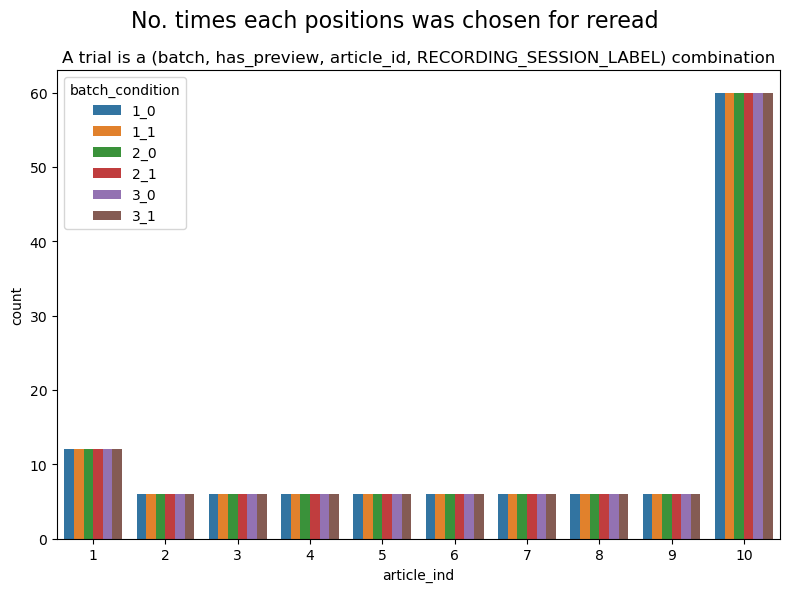

In [36]:
condition_batch_article_by_sub = et_data_enriched[
    ["has_preview", "batch", "article_id", "article_ind", "RECORDING_SESSION_LABEL"]
].drop_duplicates()

only_reread_article_trials = condition_batch_article_by_sub.groupby(
    ["batch", "has_preview", "RECORDING_SESSION_LABEL", "article_id"]
).filter(lambda x: len(x) > 1)
only_reread_article_trials = only_reread_article_trials[
    only_reread_article_trials["article_ind"] < 11
]
batch_preview_ind_counts = (
    only_reread_article_trials.groupby(["batch", "has_preview", "article_ind"])
    .size()
    .reset_index(name="count")
)
# for each (batch, has_preview) combination create a bargraph where x is article_ind and y is count
plt.subplots(figsize=(8, 6))
plt.suptitle("No. times each positions was chosen for reread", fontsize=16)
plt.title(
    "A trial is a (batch, has_preview, article_id, RECORDING_SESSION_LABEL) combination"
)
batch_preview_ind_counts["batch_condition"] = batch_preview_ind_counts.apply(
    lambda x: f'{x["batch"]}_{x["has_preview"]}', axis=1
)
sns.barplot(
    data=batch_preview_ind_counts, x="article_ind", y="count", hue="batch_condition"
)
plt.tight_layout()
plt.show()

### If trial is ('has_preview', 'batch', 'article_id', 'article_ind', 'list')

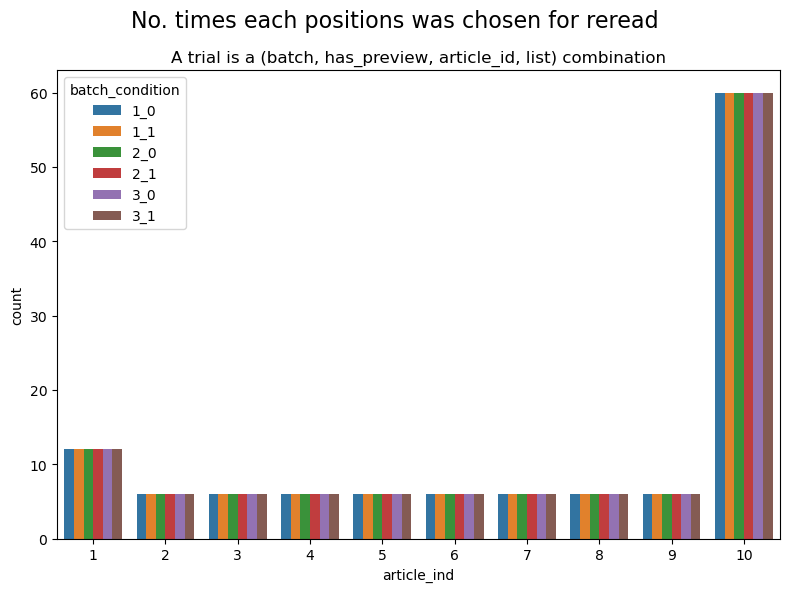

In [37]:
only_reread_article_trials = condition_batch_article_by_list.groupby(
    ["batch", "has_preview", "list", "article_id"]
).filter(lambda x: len(x) > 1)
only_reread_article_trials = only_reread_article_trials[
    only_reread_article_trials["article_ind"] < 11
]
batch_preview_ind_counts = (
    only_reread_article_trials.groupby(["batch", "has_preview", "article_ind"])
    .size()
    .reset_index(name="count")
)

# for each (batch, has_preview) combination create a bargraph where x is article_ind and y is count
plt.subplots(figsize=(8, 6))
plt.suptitle("No. times each positions was chosen for reread", fontsize=16)
plt.title("A trial is a (batch, has_preview, article_id, list) combination")
batch_preview_ind_counts["batch_condition"] = batch_preview_ind_counts.apply(
    lambda x: f'{x["batch"]}_{x["has_preview"]}', axis=1
)
sns.barplot(
    data=batch_preview_ind_counts, x="article_ind", y="count", hue="batch_condition"
)
plt.tight_layout()
plt.show()


# For each repeat article appearance (either in position 11 or 12) the re-read question should always be different than the read question. For each article the three questions should appear an equal number of times when the article is a re-read (both in position 11 and in position 12).

In [38]:
trials = et_data_enriched[
    [
        "has_preview",
        "batch",
        "article_id",
        "article_ind",
        "RECORDING_SESSION_LABEL",
        "q_ind",
        "paragraph_id",
    ]
].drop_duplicates()
trials

,has_preview,batch,article_id,article_ind,RECORDING_SESSION_LABEL,q_ind,paragraph_id
276,1,3,6,1,l42_2070,2,1
374,1,3,6,1,l42_2070,2,2
435,1,3,6,1,l42_2070,0,3
503,1,3,6,1,l42_2070,1,4
608,1,3,6,1,l42_2070,1,5
...,...,...,...,...,...,...,...
2631648,0,3,6,12,l2_324,2,3
2631716,0,3,6,12,l2_324,1,4
2631821,0,3,6,12,l2_324,1,5
2631931,0,3,6,12,l2_324,2,6


In [39]:
def is_different_reread_q(df):
    if len(df) == 2 and df["q_ind"].nunique() == 2:
        return True
    else:
        return False


trials_reread_first_and_second_reads = trials.groupby(
    ["batch", "has_preview", "RECORDING_SESSION_LABEL", "article_id", "paragraph_id"]
).filter(lambda x: len(x) > 1)
condition_batch_article_by_sub_different_reread_question = (
    trials_reread_first_and_second_reads.groupby(
        [
            "batch",
            "has_preview",
            "RECORDING_SESSION_LABEL",
            "article_id",
            "paragraph_id",
        ]
    ).apply(lambda x: is_different_reread_q(x))
)

/var/folders/fz/wnp3jl2n1z1gsgdq_g6_34ww0000gn/T/ipykernel_29892/1815154597.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  condition_batch_article_by_sub_different_reread_question = trials_reread_first_and_second_reads.groupby(['batch', 'has_preview', 'RECORDING_SESSION_LABEL', 'article_id', 'paragraph_id']).apply(lambda x: is_different_reread_q(x))


In [40]:
print(
    f"There are {len(condition_batch_article_by_sub_different_reread_question[condition_batch_article_by_sub_different_reread_question == False])} trials that have the same question both in the first and second reads"
)

There are 0 trials that have the same question both in the first and second reads


# Article position distributions

In [41]:
article_trials = et_data_enriched[
    ["has_preview", "batch", "article_id", "article_ind", "RECORDING_SESSION_LABEL"]
].drop_duplicates()

article_trials_first_read_out_of_2 = (
    article_trials.groupby(
        ["batch", "has_preview", "RECORDING_SESSION_LABEL", "article_id"]
    )
    .filter(lambda x: len(x) == 2)
    .where(lambda x: x["article_ind"] < 10)
    .dropna()
)

# convert all numbers to int
article_trials_first_read_out_of_2 = article_trials_first_read_out_of_2.astype(
    {"article_ind": int, "article_id": int, "batch": int, "has_preview": int}
)
article_trials_first_read_out_of_2

,has_preview,batch,article_id,article_ind,RECORDING_SESSION_LABEL
276,1,3,6,1,l42_2070
9701,1,3,3,4,l59_547
15685,1,3,4,1,l39_542
24995,1,3,9,4,l56_522
35333,1,3,8,9,l49_529
...,...,...,...,...,...
2596093,1,1,10,4,l10_39
2604499,0,3,5,5,l3_327
2613568,0,3,7,8,l6_329
2620766,0,3,3,7,l1_322


In [42]:
article_trials_counts_first_read_out_of_2 = (
    article_trials_first_read_out_of_2.groupby(
        ["batch", "has_preview", "article_id", "article_ind"]
    )
    .size()
    .reset_index(name="count")
)
article_trials_counts_first_read_out_of_2["batch_condition"] = (
    article_trials_counts_first_read_out_of_2.apply(
        lambda x: f'{x["batch"]}_{x["has_preview"]}', axis=1
    )
)

In [43]:
article_trials_counts_first_read_out_of_2

,batch,has_preview,article_id,article_ind,count,batch_condition
0,1,0,1,1,1,1_0
1,1,0,1,2,1,1_0
2,1,0,1,3,1,1_0
3,1,0,1,6,1,1_0
4,1,0,1,8,1,1_0
...,...,...,...,...,...,...
331,3,1,10,3,1,3_1
332,3,1,10,4,1,3_1
333,3,1,10,6,1,3_1
334,3,1,10,8,1,3_1


In [44]:
# Make all columns accept for batch_condition int
article_trials_counts_first_read_out_of_2 = (
    article_trials_counts_first_read_out_of_2.astype(
        {"article_ind": int, "article_id": int, "batch": int, "has_preview": int}
    )
)

### Creating heatmaps 

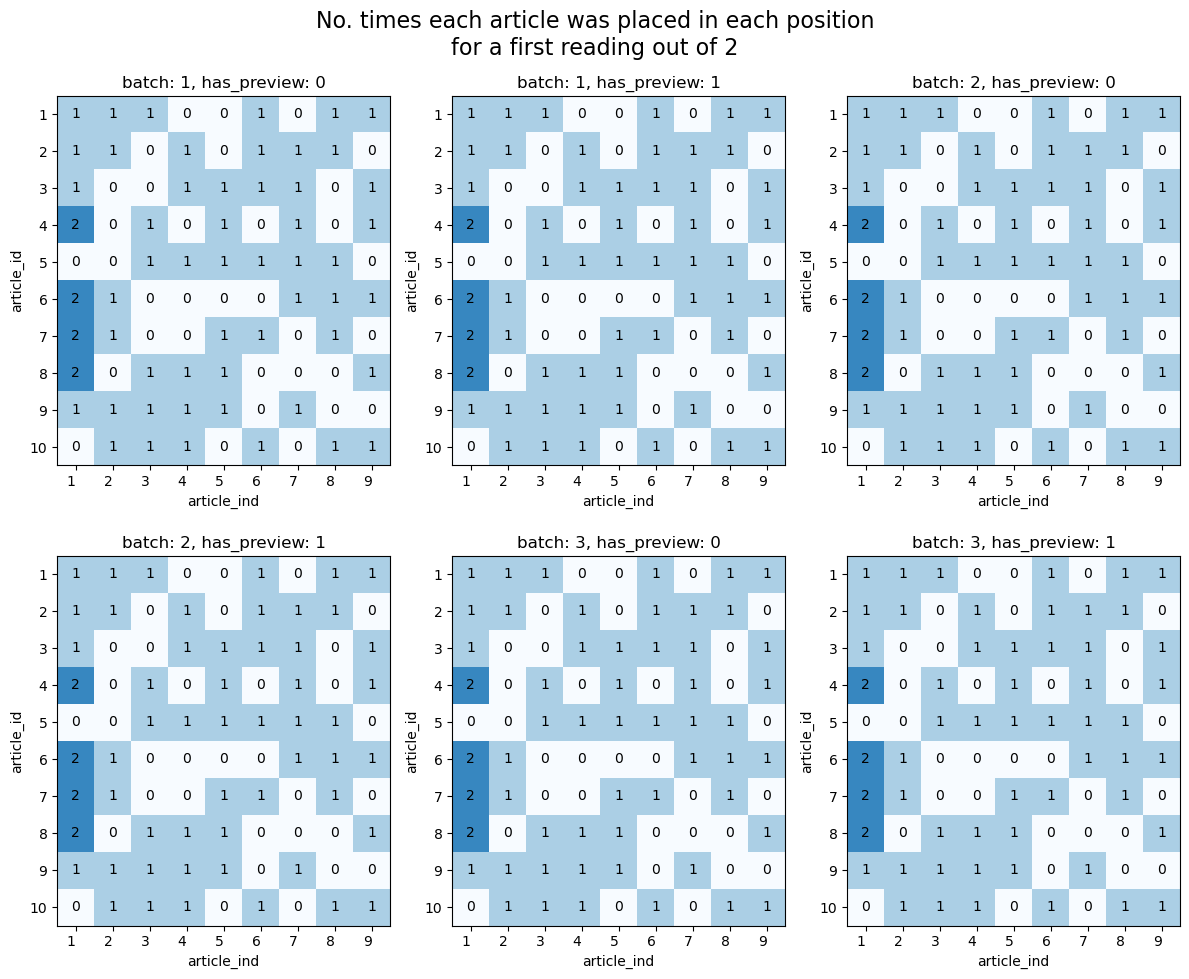

In [45]:
from matplotlib.colors import LinearSegmentedColormap

unique_batch_condition_vals = sorted(
    article_trials_counts_first_read_out_of_2["batch_condition"].unique()
)

fig, axes = plt.subplots(figsize=(12, 10), nrows=2, ncols=3)

for batch_condition in unique_batch_condition_vals:
    ax = axes[
        unique_batch_condition_vals.index(batch_condition) // 3,
        unique_batch_condition_vals.index(batch_condition) % 3,
    ]

    batch_condition_df = article_trials_counts_first_read_out_of_2[
        article_trials_counts_first_read_out_of_2["batch_condition"] == batch_condition
    ].drop(columns=["batch_condition", "batch", "has_preview"])

    # create a heatmap using matplotlib where x is article_ind, y is article_id and the color is the count
    heatmap_data = batch_condition_df.pivot(
        index="article_id", columns="article_ind", values="count"
    ).fillna(0)
    # make it int
    heatmap_data = heatmap_data.astype(int)
    # # choose colors for values 0, 1, 2, 3
    # # create a gradually increasing blue colormap with a specific color for each value between 0 and 3
    # cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'white'), (0.25, 'blue'), (0.5, 'lightblue'), (0.75, 'darkblue'), (1, 'black')])
    im = ax.imshow(heatmap_data, cmap="Blues", vmin=0, vmax=3)

    ax.set_xticks(np.arange(len(heatmap_data.columns)))
    ax.set_xticklabels(heatmap_data.columns)
    ax.set_xlabel("article_ind")

    ax.set_yticks(np.arange(len(heatmap_data.index)))
    ax.set_yticklabels(heatmap_data.index)
    ax.set_ylabel("article_id")

    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            text = ax.text(j, i, heatmap_data.iloc[i, j], ha="center", va="center")

    ax.set_title(
        f'batch: {batch_condition.split("_")[0]}, has_preview: {batch_condition.split("_")[1]}'
    )
plt.suptitle(
    "No. times each article was placed in each position\nfor a first reading out of 2",
    fontsize=16,
)

# reduce the gap between the 2 subplot columns
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.tight_layout()
plt.show()

In [46]:
article_trials = et_data_enriched[
    ["has_preview", "batch", "article_id", "article_ind", "RECORDING_SESSION_LABEL"]
].drop_duplicates()
article_trials_counts = (
    article_trials.groupby(["batch", "has_preview", "article_id", "article_ind"])
    .size()
    .reset_index(name="count")
)

article_trials = article_trials.astype(
    {"article_ind": int, "article_id": int, "batch": int, "has_preview": int}
)

article_trials_counts["batch_condition"] = article_trials_counts.apply(
    lambda x: f'{x["batch"]}_{x["has_preview"]}', axis=1
)

In [48]:
# TODO what is this?
import plotly.graph_objects as go

unique_batch_condition_vals = sorted(article_trials_counts["batch_condition"].unique())


def add_article_to_radar_fig(fig, batch_condition_df, categories, row=None, col=None):
    # take the two columns 'article_ind' and 'count' and make them into a list which is initialized with 0s
    article_ind_count_list = [0] * len(categories)
    for _, row_ in batch_condition_df[["article_ind", "count"]].iterrows():
        article_ind_count_list[row_["article_ind"] - 1] = row_["count"]

    scatterpolar = go.Scatterpolar(
        r=article_ind_count_list,
        theta=categories,
        # fill='toself',
        name=str(batch_condition_df["article_id"].iloc[0]),
    )
    if row is not None and col is not None:
        fig.add_trace(scatterpolar, row=row, col=col)
    else:
        fig.add_trace(scatterpolar)


# Leave only article_ind <= 9
article_trials_counts = article_trials_counts[
    article_trials_counts["article_ind"] <= 10
]
article_trials_counts

,batch,has_preview,article_id,article_ind,count,batch_condition
0,1,0,1,1,5,1_0
1,1,0,1,2,6,1_0
2,1,0,1,3,6,1_0
3,1,0,1,4,5,1_0
4,1,0,1,5,13,1_0
...,...,...,...,...,...,...
713,3,1,10,6,12,3_1
714,3,1,10,7,4,3_1
715,3,1,10,8,9,3_1
716,3,1,10,9,3,3_1


In [ ]:
# interactive_display = True

# for batch_condition in unique_batch_condition_vals:
#     fig = go.Figure()

#     batch_condition_df = article_trials_counts[article_trials_counts['batch_condition'] == batch_condition].drop(columns=['batch_condition', 'batch', 'has_preview'])
#     categories = list(range(1, batch_condition_df['article_ind'].max() + 1))
#     categories = [str(x) for x in categories]
#     batch_condition_df.groupby('article_id').apply(lambda x: add_article_to_radar_fig(fig, x, categories))

#     # set a title for the figure, set legend title to article_id, set ticks title to article_ind
#     fig.update_layout(
#         title_text=f'Article counts for each position. Batch: {batch_condition.split("_")[0]}, has_preview: {batch_condition.split("_")[1]}',
#         title_x=0.5,
#         legend_title='Article ID',
#         polar=dict(
#             radialaxis=dict(
#             visible=True,
#             )),
#         showlegend=True,
#         width=800,
#         height=800,
#         annotations=[dict(text='Theta: Article Ind | Radius: No. appearances', x=0.5, y=-0.1, showarrow=False, xref='paper', yref='paper', font_size=16)],
#         )
#     if not interactive_display:
#         fig.show("svg")
#     else:
#         fig.show()

In [ ]:
# # Repeat the above code, but now make a big plot with a subplot for each batch_condition
# from plotly.subplots import make_subplots
# # Leave only article_ind <= 9
# article_trials_counts = article_trials_counts[article_trials_counts['article_ind'] <= 9]

# fig = make_subplots(rows=3, cols=2, subplot_titles=unique_batch_condition_vals, specs=[[{'type': 'polar'}]*2]*3)
# for i, batch_condition in enumerate(unique_batch_condition_vals):

#     batch_condition_df = article_trials_counts[article_trials_counts['batch_condition'] == batch_condition].drop(columns=['batch_condition', 'batch', 'has_preview'])
#     categories = list(range(1, batch_condition_df['article_ind'].max() + 1))
#     categories = [str(x) for x in categories]

#     row = i // 2 +1
#     col = i % 2 +1
#     groupby_element = batch_condition_df.groupby('article_id')

#     for group in groupby_element:
#         add_article_to_radar_fig(fig, group[1], categories, row, col)

# # set a title for the figure, set legend title to article_id, set ticks title to article_ind
# fig.update_layout(
#     title_text=f'Article counts for each position',
#     legend_title='Article ID',
#     polar=dict(
#         radialaxis=dict(
#         visible=True,
#         )),
#     showlegend=True,
#     width=1000,
#     height=1000,
#     annotations=[dict(text='Article Ind (No. appearances)', x=0.5, y=-0.1, showarrow=False, xref='paper', yref='paper', font_size=16)],
#     # row = row,
#     # col = col,
#     )
# fig.update_xaxes(title_text='Article Ind (No. appearances)', row=i // 2 + 1, col=i % 2 + 1)
# fig.update_yaxes(title_text='No. appearances', row=i // 2 + 1, col=i % 2 + 1)
# fig.show()